<a href="https://colab.research.google.com/github/mgmeti/Data-Analysis/blob/main/Copy_of_Copy_of_P1_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 6619 - Deep Learning - Dr Marques
## Project 1
## Image Classifiers Using Neural Networks and the MNIST and Fashion MNIST Datasets

**Include your name here:** (enter your name)

**Include 'shared link' to 'your' final version of this NB here:** (enter link from above right here)

Useful references and sources:

**MNIST**

- https://www.tensorflow.org/datasets/catalog/mnist

- https://en.wikipedia.org/wiki/MNIST_database 

- https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb 

**Fashion MNIST**

- https://www.tensorflow.org/datasets/catalog/fashion_mnist

- https://en.wikipedia.org/wiki/Fashion_MNIST

- https://keras.io/api/datasets/fashion_mnist/

## PART 1 - *MNIST classifier using MLP*




### Import Needed Resources / Libraries

In [87]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

from keras import layers

from matplotlib import pyplot as plt

import numpy as np
import tensorflow as tf

import pandas as pd 
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


### Load and prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Examine Data

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

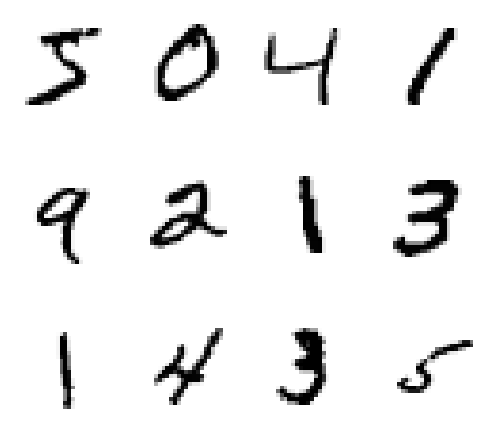

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

In [9]:
y_valid[0]

7

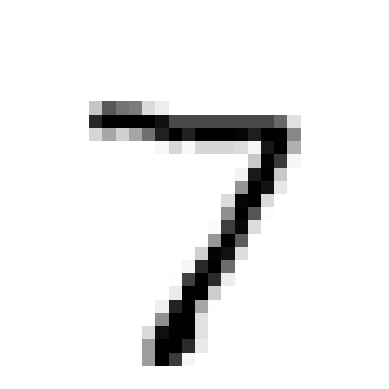

In [10]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [11]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [12]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [13]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Configure model

In [14]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [16]:
(64*784)

50176

In [17]:
(64*784)+64

50240

In [18]:
(10*64)+10

650

In [19]:
model.compile(
    loss='mean_squared_error', 
    optimizer=SGD(learning_rate=0.01), 
    metrics=['accuracy']
)

### Train!

In [20]:
batch_size=128
epochs=200

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/200
469/469 [==============================] - 5s 3ms/step - loss: 0.0944 - accuracy: 0.1043 - val_loss: 0.0929 - val_accuracy: 0.1140
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0922 - accuracy: 0.1246 - val_loss: 0.0914 - val_accuracy: 0.1314
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0910 - accuracy: 0.1419 - val_loss: 0.0905 - val_accuracy: 0.1451
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0903 - accuracy: 0.1524 - val_loss: 0.0899 - val_accuracy: 0.1545
Epoch 5/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0897 - accuracy: 0.1610 - val_loss: 0.0894 - val_accuracy: 0.1685
Epoch 6/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0893 - accuracy: 0.1833 - val_loss: 0.0890 - val_accuracy: 0.2127
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0889 - accuracy: 0.2270 - val_loss: 0.0886 - val_accuracy: 0.2568

### Plot learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


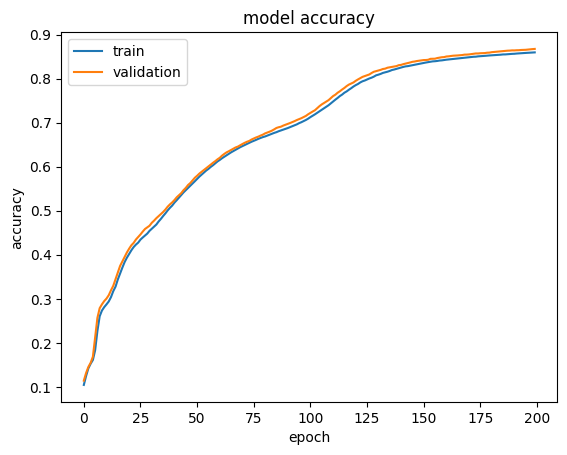

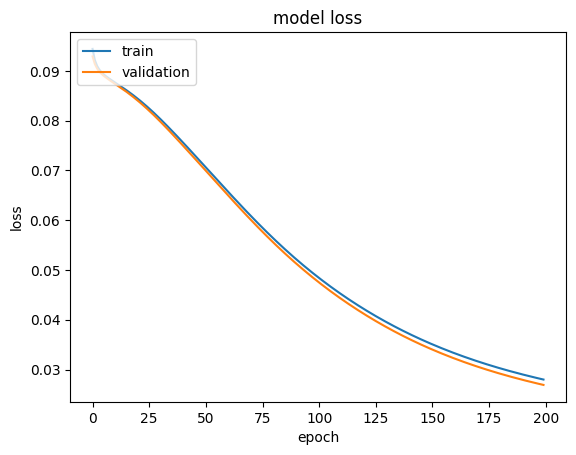

In [21]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Evaluate the model

In [22]:
model.evaluate(X_validation, y_validation)

313/313 [==============================] - 1s 2ms/step - loss: 0.0269 - accuracy: 0.8677


[0.026904979720711708, 0.8676999807357788]

## **PART 1** - *Your Turn* 

### **Part 1 - Tasks:**  *(40 pts)*
1. Write code to display the confusion matrix for your classifier and comment on the insights such confusion matrix provides. See [this](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) for an example.

2. Write code to display 10 cases where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.

#### 1.a. Confusion Matrix *(10 pts)*

In [ ]:
# Your Confusion Matrix code here and in additional cells as needed
y_validation_predictions = model.predict(X_validation)


y_pred=np.argmax(y_validation_predictions, axis=1)
y_test=np.argmax(y_validation, axis=1)
cm = confusion_matrix(y_test, y_pred)


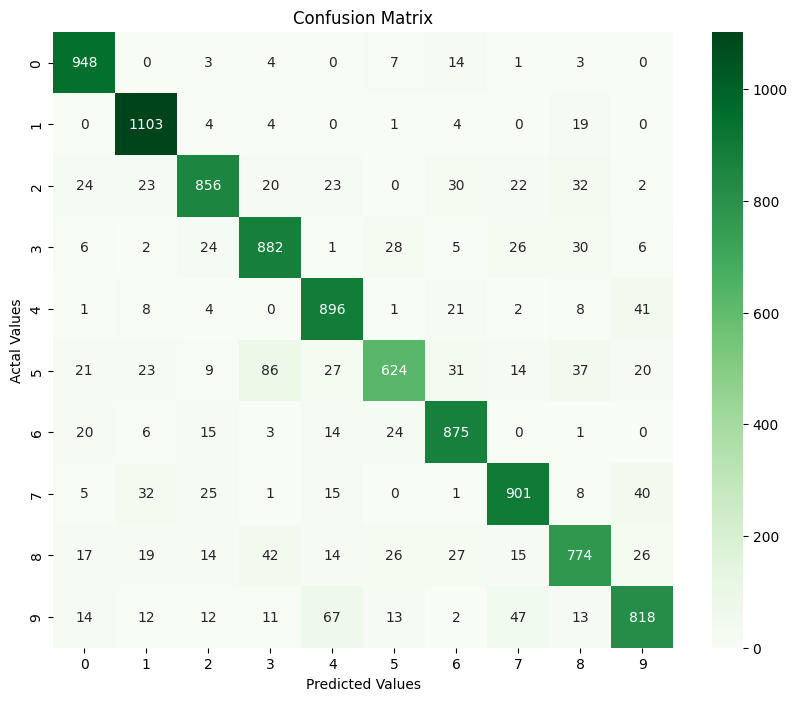

In [57]:
number_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index =number_classes, 
                     columns =number_classes)


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt='d',  cmap="Greens",  linecolor="gray" )
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

#### 1.b. Comment on the insights confusion matrix provides *(10 pts)*



The confusion matrix provides valuable insights into the performance of a classification model. Here's an analysis of the provided confusion matrix for the MNIST number classification task:

**Accuracy and Misclassifications:**

>Overall, the model achieves high accuracy, as indicated by the high values on
the diagonal of the matrix. The diagonal represents the correctly predicted instances for each class.

>The highest accuracy is observed for the number 1, with 1103 correct predictions.

>The lowest accuracy is observed for the numbers 5 and 8, with 624 and 774 correct predictions, respectively.

>The model tends to misclassify some instances, leading to off-diagonal values. For example, there are instances of number 2 classified as number 6 (30 instances) and number 8 classified as number 4 (42 instances).


**Confusion Between Similar Digits:**

>The confusion matrix reveals that the model often confuses similar-looking digits, such as 4 and 9. This is evident from the relatively high number of instances where number 4 is misclassified as number 9 (41 instances).
Similarly, there are instances of number 7 being misclassified as number 9 (40 instances).

**Class Imbalance:**

>The matrix indicates that the dataset is relatively balanced, with similar numbers of instances for each class.
However, some slight variations in class distribution can be observed. For example, the number 5 has a relatively higher number of misclassifications compared to other digits.


**Performance Variation:**

>The matrix reveals variations in the model's performance across different digits.
>Some digits, such as 0 and 1, are generally well-predicted with high accuracy.
>Other digits, such as 8 and 9, exhibit relatively lower accuracy, indicating a greater difficulty in distinguishing these digits from others.

**Specific Errors:**

>The matrix provides insights into specific types of misclassifications. For instance, there are instances of number 3 being misclassified as number 8 (30 instances) and number 8 being misclassified as number 3 (42 instances).



#### 2.Display 10 cases where the classifier makes mistakes. *(20 pts)*

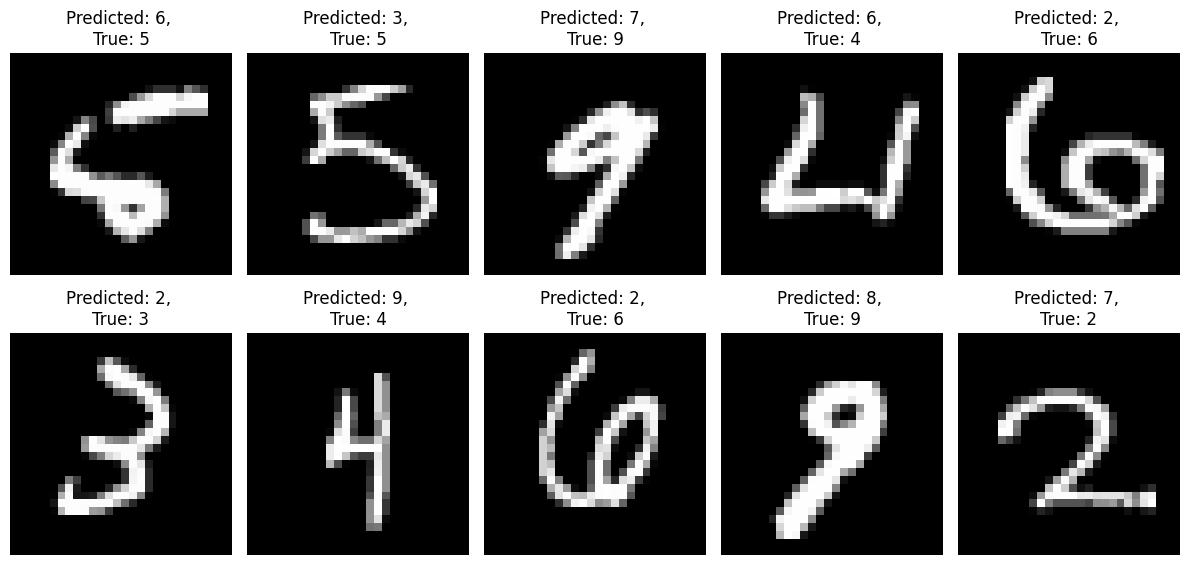

In [61]:
# Your code here and in additional cells as needed

# Find indices where predictions and ground truth labels do not match
incorrect_indices = np.where(y_pred != y_test)[0]


# Display 10 cases where the classifier makes mistakes
num_cases = 10
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(num_cases):
    index = incorrect_indices[i]

    # Display the image
    axes[i].imshow(X_validation[index].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Predicted: {y_pred[index]}, \nTrue: {y_true[index]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## PART 2 - *Fashion MNIST*




### Load and prepare the data

In [63]:
# Model / data parameters
num_classes = 10
input_shape = [28 ,28]

In [64]:
# Loading and Spliting Data in Test and Train 
(X_train, y_train), (X_valid, y_valid) = tf.keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_valid.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_valid.shape == (10000,)

4422102/4422102 [==============================] - 0s 0us/step


### Defining Classes

In [65]:
classes_names = ['T-shirt/top' ,  'Trouser' ,'Pullover' , 'Dress', 'Coat','Sandal','Shirt','Sneaker', 'Bag','Ankle Boot'] 

### Examine Data

In [66]:
X_train.shape

(60000, 28, 28)

In [67]:
y_valid.shape

(10000,)

In [68]:
y_train[0:12]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9], dtype=uint8)

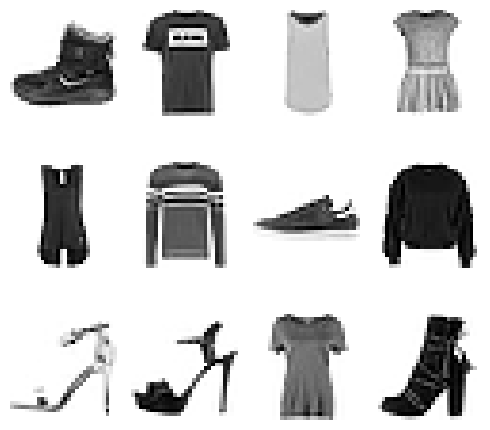

In [69]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [70]:
X_valid.shape

(10000, 28, 28)

In [71]:
y_valid.shape

(10000,)

In [72]:
y_valid[0]

9

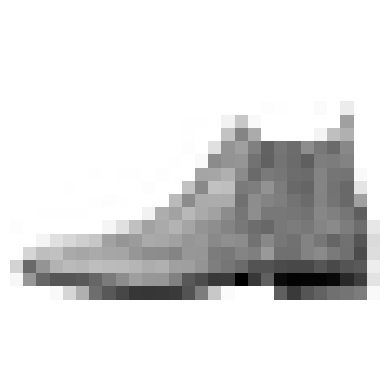

In [73]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [74]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [75]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [76]:
print(y_valid[0])
print(y_validation[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## **PART 2** - *Your Turn*

### **Part 2 - Tasks:** *(60 pts)*
Build a NN solution identical to the one before: *(20 pts)*
> a. Plot learning curves *(10 pts)*

> b. Display the confusion matrix for your classifier *(10 pts)*

> c. Evaluate the model, identify accuracy, etc. *(10 pts)*

> d. Discuss why the results are not as good. *(10 pts)*





#### NN solution *(20 pts)*

Configure the Model *(10 pts)*

In [77]:
# Your Configure the Model code here and in additional code cells as needed
# use same model and hyperparameters as was used for MNIST above
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(
    loss='mean_squared_error', 
    optimizer=SGD(learning_rate=0.01), 
    metrics=['accuracy']
)

Train the Model  *(10 pts)*

In [80]:
# Your Train the Model code here and in additional code cells as needed
# same as was used in MNIST above
batch_size=128
epochs=200

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0957 - accuracy: 0.1086 - val_loss: 0.0942 - val_accuracy: 0.1226
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0933 - accuracy: 0.1354 - val_loss: 0.0925 - val_accuracy: 0.1553
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0919 - accuracy: 0.1759 - val_loss: 0.0913 - val_accuracy: 0.1929
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0908 - accuracy: 0.2114 - val_loss: 0.0904 - val_accuracy: 0.2222
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0899 - accuracy: 0.2382 - val_loss: 0.0895 - val_accuracy: 0.2484
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0891 - accuracy: 0.2678 - val_loss: 0.0888 - val_accuracy: 0.2861
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0884 - accuracy: 0.3126 - val_loss: 0.0881 - val_accuracy: 0.3364

#### Plot learning curves *(10 pts)*

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


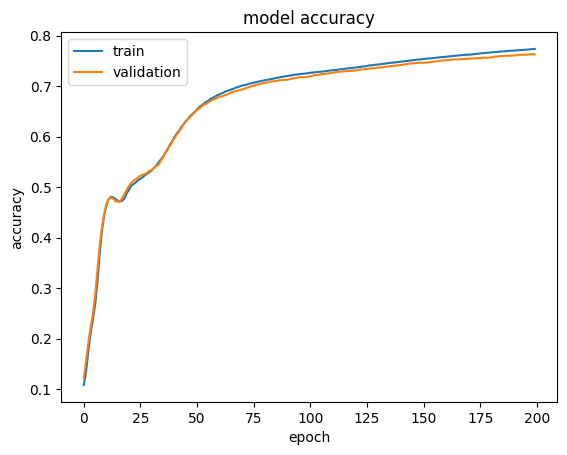

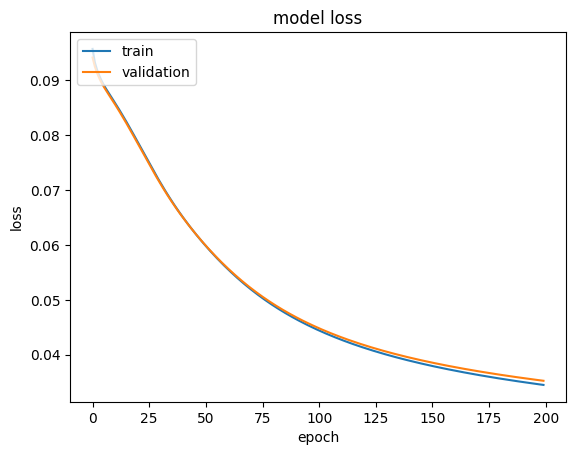

In [81]:
# Your Plot learning curves code here and in additional code cells as needed
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Display the confusion matrix for your classifier *(10 pts)*

In [83]:
# Your Confusion Matrix code here and in additional cells as needed
y_validation_predictions = model.predict(X_validation)


y_pred=np.argmax(y_validation_predictions, axis=1)
y_test=np.argmax(y_validation, axis=1)
cm = confusion_matrix(y_test, y_pred)


313/313 [==============================] - 0s 1ms/step


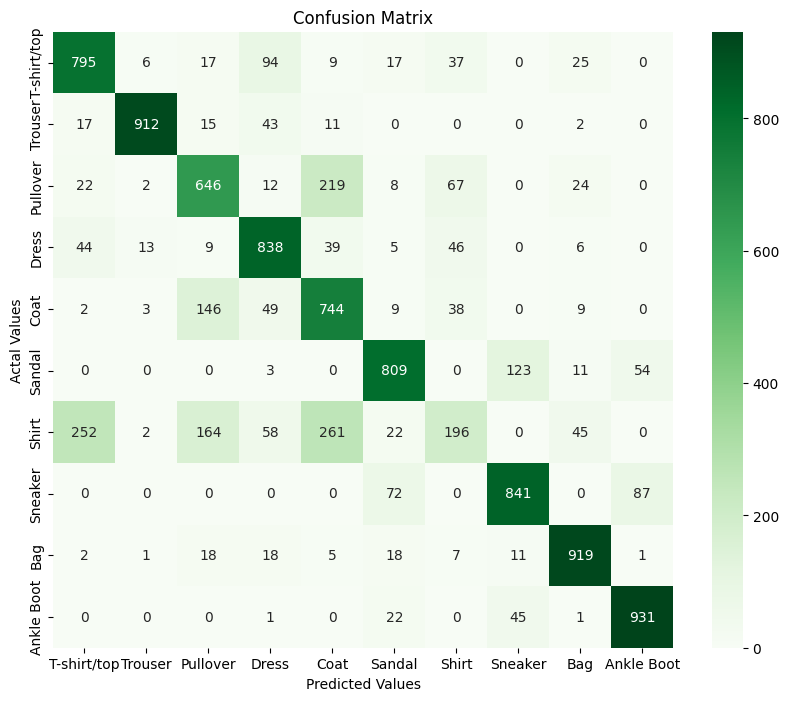

In [84]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index =classes_names, 
                     columns =classes_names)


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt='d',  cmap="Greens",  linecolor="gray" )
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

#### Evaluate the model, identify accuracy, etc. *(10 pts)*

In [89]:
# Your Evaluate the model code here and in additional code cells as needed
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_validation, y_validation)

# Calculate other evaluation metrics
classification = classification_report(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the metrics
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print(f"\nClassification Report:\n{classification}")



313/313 [==============================] - 1s 2ms/step - loss: 0.0352 - accuracy: 0.7631
Test Loss: 0.0352
Test Accuracy: 0.7631
Precision: 0.75365292529142
Recall: 0.7631
F1 Score: 0.7498517077385308

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1000
           1       0.97      0.91      0.94      1000
           2       0.64      0.65      0.64      1000
           3       0.75      0.84      0.79      1000
           4       0.58      0.74      0.65      1000
           5       0.82      0.81      0.82      1000
           6       0.50      0.20      0.28      1000
           7       0.82      0.84      0.83      1000
           8       0.88      0.92      0.90      1000
           9       0.87      0.93      0.90      1000

    accuracy                           0.76     10000
   macro avg       0.75      0.76      0.75     10000
weighted avg       0.75      0.76      0.75     10000



#### Discuss why the results are not as good. 

If you had more time what would you do to improve the results? *(10 pts)*

Here are a few potential reasons for the suboptimal results:
<br>
>**Complex Class Relationships**: The classes in the dataset might have 
intricate relationships that are difficult to learn. For example, differentiating between similar classes like T-shirt/top and Shirt, or distinguishing between different types of dresses and pullovers can be challenging. In such cases, the model might struggle to capture the subtle differences, leading to lower accuracy and F1 scores.
<br>

>**Limited Model Capacity**: The model architecture or complexity might not be sufficient to capture the underlying patterns in the data. If the model lacks the capacity to learn intricate features or relationships, it can result in reduced performance. Consider using more complex models or increasing the model's capacity by adding more layers or neurons.
<br>

>**Insufficient Training**: The model might not have been trained for a sufficient number of epochs or with enough training data. Deep learning models often require extensive training on diverse data to generalize well. If the model was trained for a limited duration or with a small dataset, it might not have converged to an optimal solution, leading to lower accuracy and performance.
<br>

>**Hyperparameter Tuning**: The model's hyperparameters, such as learning rate, batch size, or optimizer, might not have been appropriately tuned. Improper hyperparameter settings can hinder the model's learning process and result in suboptimal performance. Conducting a thorough hyperparameter search or employing techniques like grid search or random search might help improve the model's performance.
<br>



In [91]:
# (OPTIONAL) Additional code to demonstrate possible improvements to the model in Part 2.
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))  # Increase number of neurons
model.add(Dense(64, activation='relu'))  # Additional dense layer
model.add(Dense(32, activation='relu'))  # Additional dense layer
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='mean_squared_error', 
    optimizer=SGD(learning_rate=0.01), 
    metrics=['accuracy']
)


In [92]:
batch_size = 128
epochs = 200

history = model.fit(
    X_training,  # training data
    y_training,  # training targets
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
    validation_data=(X_validation, y_validation)
)


Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0888 - accuracy: 0.2195 - val_loss: 0.0880 - val_accuracy: 0.2692
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0873 - accuracy: 0.2986 - val_loss: 0.0866 - val_accuracy: 0.3230
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0858 - accuracy: 0.3447 - val_loss: 0.0851 - val_accuracy: 0.3610
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0841 - accuracy: 0.3824 - val_loss: 0.0833 - val_accuracy: 0.3995
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0821 - accuracy: 0.4167 - val_loss: 0.0811 - val_accuracy: 0.4273
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0797 - accuracy: 0.4385 - val_loss: 0.0785 - val_accuracy: 0.4483
Epoch 7/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0768 - accuracy: 0.4605 - val_loss: 0.0753 - val_accuracy: 0.4749

In [94]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_validation, y_validation)

# Calculate other evaluation metrics
classification = classification_report(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the metrics
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print(f"\nClassification Report:\n{classification}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0221 - accuracy: 0.8495
Test Loss: 0.0221
Test Accuracy: 0.8495
Precision: 0.75365292529142
Recall: 0.7631
F1 Score: 0.7498517077385308

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1000
           1       0.97      0.91      0.94      1000
           2       0.64      0.65      0.64      1000
           3       0.75      0.84      0.79      1000
           4       0.58      0.74      0.65      1000
           5       0.82      0.81      0.82      1000
           6       0.50      0.20      0.28      1000
           7       0.82      0.84      0.83      1000
           8       0.88      0.92      0.90      1000
           9       0.87      0.93      0.90      1000

    accuracy                           0.76     10000
   macro avg       0.75      0.76      0.75     10000
weighted avg       0.75      0.76      0.75     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


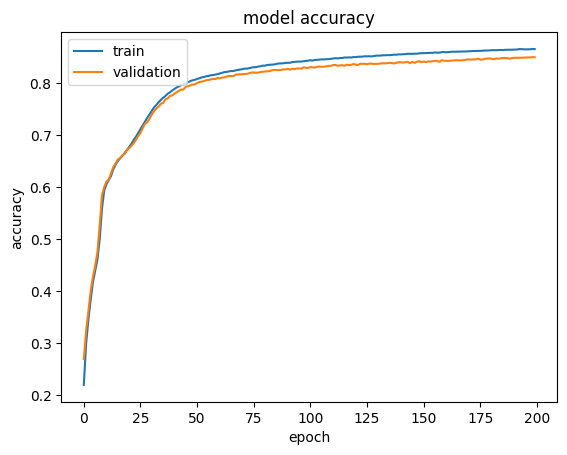

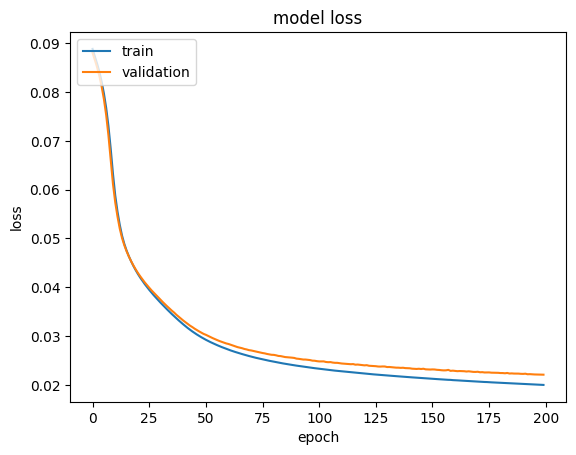

In [96]:
# Your Plot learning curves code here and in additional code cells as needed
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Conversion of colab notebook file to HTML file as report

In [99]:
%%shell
jupyter nbconvert --to html /content/Copy_of_Copy_of_P1_starter.ipynb

[NbConvertApp] Converting notebook /content/Copy_of_Copy_of_P1_starter.ipynb to html
[NbConvertApp] Writing 1237046 bytes to /content/Copy_of_Copy_of_P1_starter.html
